![](https://wallpapercave.com/wp/wp4496558.jpg)

Football is amongst the most popular sports worldwide, with famous players such as Lionel Messi, Cristiano Ronaldo, and Neymar Jr. They have bought a decade of heat and interest in this particular sport. 

When watching the game, we find that the commentator can usually quote a player's historical and real-time performance easily, compare their career history, and perform in the ongoing season based on their past encounters. Such comparisons must have a robust database to back up the claim or even involve rather complex data analysis.

Sometimes, if the players are not familiar with each other, those statistics can help them develop countermeasures. For players themselves, studying that data can remind them what they should improve and whether they should change their strategy pattern at a certain point in the game. For common audiences like ourselves, that data is a fun thing to look at and may help us even predict who the winner will be.

This project mainly focuses on those interesting prospects of football games and compares the statistical standings of the players using different factors. This project's primary goal is to suggest relevant players using Nearest Neighbour depending on their ratings and overall growth, relevant to their ranking.

# Index

* <a href='#1'>1.Data Preprocessing and Feature Engineering</a>
    - <a href='#1.1'> Position Column</a>
    - <a href='#1.2'> Player's Work Rate</a>
    - <a href='#1.3'> Player's Position</a>
    - <a href='#1.4'> BMI</a>
    - <a href='#1.5'> Missing Value Estimation</a>
    - <a href='#1.6'> Fill Missing Value</a>
* <a href='#2'>2. Exploratory Data Analysis</a>
    - <a href='#2.1'> Overall Rating vs Value in Euros</a>
    - <a href='#2.2'> Player's Growth with Time</a>
    - <a href='#2.3'> Nationality vs Overall</a>
    - <a href='#2.4'> Overall vs BMI</a>
    - <a href='#2.5'> Nationality vs BMI</a>
    - <a href='#2.6'> Proportion per Position</a>
    - <a href='#2.7'> Unpaired or Independent t-test</a>
* <a href='#3'>3. Pick Top 5 Players per Position</a><br>
* <a href='#4'>4. Recommend Alternate Playing Position</a><br>
* <a href='#5'>5. Player Recommendation</a><br>
* <a href='#6'>6. Club Similarity Rating</a><br>

In [1]:
import numpy as np
import pandas as pd   
import random 
import plotly.graph_objects as go
import plotly.express as px
import plotly
import os
import ipywidgets
import ipywidgets as widgets

In [2]:
df_16 = pd.read_csv("players_16.csv", error_bad_lines=False)
df_17 = pd.read_csv("players_17.csv", error_bad_lines=False)
df_18 = pd.read_csv("players_18.csv", error_bad_lines=False)
df_19 = pd.read_csv("players_19.csv", error_bad_lines=False)
df_20 = pd.read_csv("players_20.csv", error_bad_lines=False)
df_league = pd.read_csv("teams_and_leagues.csv", error_bad_lines=False)

In [3]:
df_20.head()

ranking  sofifa_id  ...   rcb    rb
0        1     158023  ...  52+2  63+2
1        2      20801  ...  53+3  61+3
2        3     190871  ...  46+3  61+3
3        4     200389  ...   NaN   NaN
4        5     183277  ...  49+3  61+3

[5 rows x 105 columns]

# <a id='1'> Data Preprocessing & Feature Engineering </a>

In [4]:
# Drop Unnecessary columns
df_20 = df_20.drop(['sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number'], axis=1)
df_19 = df_19.drop(['sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number'], axis=1)
df_18 = df_18.drop(['sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number'], axis=1)
df_17 = df_17.drop(['sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number'], axis=1)
df_16 = df_16.drop(['sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number'], axis=1)

### <a id='1.1'> 1: Position Columns </a>
Here we are cleaning, processing and assigning new attributes to columns listed below. These columns will be used to identify best alternate playing position based on ratings:
<br>
'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'

In [5]:
df_20.head()

ranking         short_name  age        dob  ...   lcb    cb   rcb    rb
0        1           L. Messi   32  6/24/1987  ...  52+2  52+2  52+2  63+2
1        2  Cristiano Ronaldo   34   2/5/1985  ...  53+3  53+3  53+3  61+3
2        3            Neymar    27   2/5/1992  ...  46+3  46+3  46+3  61+3
3        4           J. Oblak   26   1/7/1993  ...   NaN   NaN   NaN   NaN
4        5          E. Hazard   28   1/7/1991  ...  49+3  49+3  49+3  61+3

[5 rows x 97 columns]

In [6]:
stats = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']
for col in stats:
    new = df_20[col].str.split("+", n = 1, expand = True)
    df_20[col] = new[0]
# Replace NaN with 0
df_20[stats] = df_20[stats].fillna(0)
df_20[stats] = df_20[stats].astype(int)
df_20[stats].head(6)

ls  st  rs  lw  lf  cf  rf  rw  ...  cdm  rdm  rwb  lb  lcb  cb  rcb  rb
0  89  89  89  93  93  93  93  93  ...   66   66   68  63   52  52   52  63
1  91  91  91  89  90  90  90  89  ...   61   61   65  61   53  53   53  61
2  84  84  84  90  89  89  89  90  ...   61   61   66  61   46  46   46  61
3   0   0   0   0   0   0   0   0  ...    0    0    0   0    0   0    0   0
4  83  83  83  89  88  88  88  89  ...   63   63   66  61   49  49   49  61
5  82  82  82  87  87  87  87  87  ...   77   77   77  73   66  66   66  73

[6 rows x 26 columns]

### <a id='1.2'> 2: Player's Work Rate </a>
Converting the categorical values in Work Rate column in integer values. These columns are used to identify players work rate in attack and defence position. Having one-hot encoding them provides us to use these features in further analysis and recommendations.

In [7]:
# Create dummy variables and append to dataframe
df_20 = pd.concat([df_20, pd.get_dummies(df_20['work_rate'])], axis=1)
# Drop original work_rate column
df_20 = df_20.drop(['work_rate'], axis=1)
df_20.shape

(18278, 105)

### <a id='1.3'> 3: Player's Position </a>
Convert the categorical values in Player's Position column in integer values. These columns are used to identify players playing positions (single-multi). Having one-hot encoding them provides us to use these features in further analysis and recommendations.

In [8]:
df_20 = pd.concat([df_20, df_20['player_positions'].str.get_dummies(sep=', ').add_prefix('Position_')], axis=1) 
# Drop original work_rate column
df_20 = df_20.drop(['player_positions'], axis=1)
df_20.shape

(18278, 119)

### <a id='1.4'> 4. BMI: New feature creation </a>
Creation of a BMI feature using Weight_kg & Height_cm and use it instead of 'body_type' feature.

In [9]:
df_20['bmi'] = df_20['weight_kg'] / (df_20['height_cm']/100)**2
df_19['bmi'] = df_19['weight_kg'] / (df_19['height_cm']/100)**2
df_18['bmi'] = df_18['weight_kg'] / (df_18['height_cm']/100)**2
df_17['bmi'] = df_17['weight_kg'] / (df_17['height_cm']/100)**2
df_16['bmi'] = df_16['weight_kg'] / (df_16['height_cm']/100)**2
df_20['bmi'].head(6)

0    24.913495
1    23.735308
2    22.204082
3    24.615211
4    24.163265
5    21.366869
Name: bmi, dtype: float64

### <a id='1.5'> 5: Missing Value Estimation </a>
Count of missing elements in each columns

In [10]:
# Check the missing values in the columns
missing_data = df_20.isnull().sum().sort_values(ascending=False)
missing_data = missing_data.reset_index(drop=False)
missing_data = missing_data.rename(columns={"index": "Columns", 0: "Value"})
missing_data['Proportion'] = (missing_data['Value']/len(df_20))*100

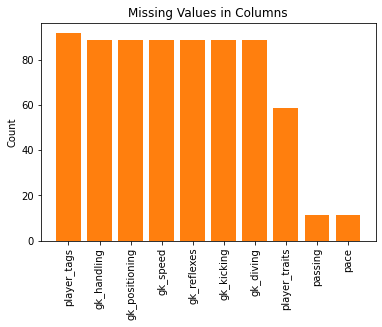

In [11]:
import matplotlib.pyplot as plt
plt.bar(x = missing_data.Columns.head(10), height = missing_data.Proportion.head(10));
plt.ylabel('Count')
plt.title('Missing Values in Columns')
plt.xticks(rotation='vertical')
plt.bar(x = missing_data.Columns.head(10), height = missing_data.Proportion.head(10));

**Comments:** This bar chart provides an overview of columns that have more than 10% of missing values. Here columns related to goalkeeper attributes and player tags & traits have the highest missing values.

### <a id='1.6'> 6: Fill Missing Values </a>
Columns: "dribbling", "defending", "physic", "passing", "shooting", "pace" can't have minimum value as 0.
<br>
Position attributes and player positions missing values have been computed in steps above.

In [12]:
# Fill missing values of these columns by median
cols = ["dribbling", "defending", "physic", "passing", "shooting", "pace"]
for col in cols:
    df_20[col] = df_20[col].fillna(df_20[col].median())
df_20 = df_20.fillna(0)
df_20.isnull().sum()

ranking         0
short_name      0
age             0
dob             0
height_cm       0
               ..
Position_RM     0
Position_RW     0
Position_RWB    0
Position_ST     0
bmi             0
Length: 120, dtype: int64

# <a id='2'> Exploratory Data Analysis </a>

### <a id='2.1'> 1: Scatter Plot (colored by Age) year 2020 - Overall Rating vs Value in Euros </a>

In [13]:
fig = go.Figure()

fig = go.Figure(data=go.Scatter(
    x = df_20['overall'],
    y = df_20['value_eur'],
    mode='markers',
    marker=dict(
        size=10,
        color=df_20['age'], 
        colorscale='Plasma', 
        showscale=True
    ),
    text= df_20['short_name'],
))

fig.update_layout(title='Styled Scatter Plot (colored by Age) year 2020 - Overall Rating vs Value in Euros',
                  xaxis_title='Overall Rating',
                  yaxis_title='Value in Euros',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()

**Conclusion:** This scatter plot illustrates the value of a player based on their overall rating. Here our key focus is on top right corner. Here we can notice that players with highest overall rating are valued more based on age group 25-30. From the plot we can see that Neymar Jr has the highest value in the age group 25-30. Most players which are above 30 years are valued less despite their high overall. 

### <a id='2.2'> 2: Scatterpolar - Player's Growth with Time </a>

In [14]:
import re
@widgets.interact( x = df_20.short_name)
def playergrowth(x):
    a = df_20[df_20.short_name.str.startswith(x)]
    b = df_19[df_19.short_name.str.startswith(x)]
    c = df_18[df_18.short_name.str.startswith(x)]
    d = df_17[df_17.short_name.str.startswith(x)]
    e = df_16[df_16.short_name.str.startswith(x)]
    
    trace0 = go.Scatterpolar(
      r = [a['pace'].values[0],a['shooting'].values[0],a['passing'].values[0],a['dribbling'].values[0],a['defending'].values[0],a['physic'].values[0],a["overall"].values[0]],
      theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
      line_color = "yellow",
      name = '2020'
    )

    trace1 = go.Scatterpolar(
      r = [b['pace'].values[0],b['shooting'].values[0],b['passing'].values[0],b['dribbling'].values[0],b['defending'].values[0],b['physic'].values[0],b["overall"].values[0]],
      theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
      line_color = "orange",
      name = '2019'
    )
    
    trace2 = go.Scatterpolar(
      r = [c['pace'].values[0],c['shooting'].values[0],c['passing'].values[0],c['dribbling'].values[0],c['defending'].values[0],c['physic'].values[0],c["overall"].values[0]],
      theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
      line_color = "red",
      name = '2018'
    )
    
    trace3 = go.Scatterpolar(
      r = [d['pace'].values[0],d['shooting'].values[0],d['passing'].values[0],d['dribbling'].values[0],d['defending'].values[0],d['physic'].values[0],d["overall"].values[0]],
      theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
      line_color = "blue",
      name = '2017'
    )
    
    trace4 = go.Scatterpolar(
      r = [e['pace'].values[0],e['shooting'].values[0],e['passing'].values[0],e['dribbling'].values[0],e['defending'].values[0],e['physic'].values[0],e["overall"].values[0]],
      theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
      line_color = "magenta",
      name = '2016'
    )
    
    data = [trace0, trace1, trace2, trace3, trace4]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 100]
        )
      ),
      template="plotly_white",  
      showlegend = True,
      font=dict(family='Cambria, monospace', size=12, color='#000000'),
      title = "Stats: {} from 2016 to 2020".format(a.short_name.values[0])
        
    )
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig, filename = "Player stats")   

interactive(children=(Dropdown(description='x', options=('L. Messi', 'Cristiano Ronaldo', 'Neymar ', 'J. Oblak…

**Conclusion:** This scatterpolar chart illustrates the ratings of each players in various aspects of the attributes given over the period of 5 years. This plot shows in which aspects the player is growing individually over the period. 

### <a id='2.3'> 3: Scatter Plot - Nationality vs Overall </a>

In [15]:
fig = go.Figure()
sample = df_20.sort_values(by='nationality')
fig = go.Figure(data=go.Scatter(
    x = sample['overall'],
    y = sample['nationality'],
    mode='markers',
    marker=dict(
        size=6,
        color=sample['overall'], 
        colorscale='Viridis_r', 
        showscale=True
    ),
    text= sample['short_name']
))

fig.update_layout(title='Styled Scatter Plot - Nationality vs Overall',
                  xaxis_title='Overall Rating',
                  yaxis_title='Nationality',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000')
                 )
fig.show()

**Conclusion:** This scatter plot provides an overview of spread of player's rated across x-axis per nationality (y-axis). Here we can suspect clearly few outliers i.e. players with relatively high overall and relatively low overall. Also, this scatter plot highlights that specific countries with more players playing the game at league level hinting towards possible scouting destination.

### <a id='2.4'> 4: Box Plot (with Suspected Outliers) - Overall Rating vs BMI </a>

In [16]:
fig = go.Figure()
sample = df_20.sort_values(by='overall')

fig.add_trace(go.Box(
    x = sample['overall'],
    y = sample['bmi'],
    name="Suspected Outliers",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        size=6,
        color='rgb(251, 158, 58)',
        outliercolor='rgba(216, 87, 107, 0.6)',
        line=dict(
            outliercolor='rgba(216, 87, 107, 0.6)',
            outlierwidth=2)),
    line_color='rgb(73, 3, 159)',
    text= sample['short_name']
))

fig.update_layout(title='Styled Box Plot (with Suspected Outliers) - Overall Rating vs BMI',
                  xaxis_title='Overall Rating',
                  yaxis_title='BMI',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'),
                  xaxis_rangeslider_visible=True)
fig.show()

**Conclusion:** This box plot highlights relationship between Overall Rating and BMI. Here players with generally high or low BMI colour coded in orange are confirmed outliers. Player's color coded with Pink are suspected outlier. One interesting find is that players having Overall Rating above 80 are relatively fitter than players with overall rating between 55-80. And our top most rated players their BMI within 21 and 25 (extremely fit).

### <a id='2.5'> 5: Box Plot (with Suspected Outliers) - Nationality vs BMI </a>

In [17]:
fig = go.Figure()
sample = df_20.sort_values(by='nationality')

fig.add_trace(go.Box(
    x = sample['nationality'],
    y = sample['bmi'],
    name="Suspected Outliers",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        size=8,
        color='rgb(180, 222, 43)',
        outliercolor='rgba(31, 158, 137, 0.6)',
        line=dict(
            outliercolor='rgba(31, 158, 137, 0.6)',
            outlierwidth=2)),
    line_color='rgb(72, 40, 120)',
    text= sample['short_name']
))

fig.update_layout(title='Styled Box Plot (with Suspected Outliers) - Nationality vs BMI',
                  xaxis_title='Nationality',
                  yaxis_title='BMI',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'),
                  xaxis_rangeslider_visible=True)
fig.show()

**Conclusion:** This box plot highlights relationship between Nationality and BMI. Here players with generally high or low BMI colour coded in lime are confirmed outliers. Player's color coded with Green are suspected outlier. While this plot tries to look for a relationship that would identify if nationalities have any impact on player's BMI, which results in false from above box plot.

### <a id='2.6'> 6: Proportion of Player's per Position </a>

In [18]:
attack = ['RW', 'LW', 'ST', 'CF', 'LS', 'RS', 'RF', 'LF']
sample = df_20.query('team_position in @attack')    
fig = px.pie(sample, names='team_position',
             color_discrete_sequence=px.colors.sequential.Plasma_r,
             title='Percentage of players in Attacker Role')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()

In [19]:
mid = ['CAM', 'RCM', 'CDM', 'LDM', 'RM', 'LCM', 'LM', 'RDM', 'RAM','CM', 'LAM']
sample = df_20.query('team_position in @mid')    
fig = px.pie(sample, names='team_position',
             color_discrete_sequence=px.colors.sequential.Viridis_r,
             title='Percentage of players in Midfielder Role')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()

In [20]:
defence = ['LCB', 'RCB', 'LB', 'RB', 'CB', 'RWB', 'LWB']
sample = df_20.query('team_position in @defence')    
fig = px.pie(sample, names='team_position',
             color_discrete_sequence=px.colors.sequential.Magma_r,
             title='Percentage of players in Defender Role')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()

### <a id='2.7'> 7: Unpaired or Independent t test </a>

Two Sample independent t-test is used to compare the means of two independent groups. For example, we have two different playing foots (Left foot and Right foot) and would like to compare if the overall rating of left-foot is significantly different from right-foot. There are 3 different hypotheses tests as follows:
<br>

* Null hypotheses: Two group means are equal
* Alternative hypotheses: Two group means are different (two-tailed)
* Alternative hypotheses: Mean of one group either greater or lesser than another group (one-tailed)

In [21]:
fig = px.pie(df_20, names = 'preferred_foot', title = "Percentage of players preferred foot")
fig.show()

In [22]:
from scipy import stats
a = df_20[df_20['preferred_foot']=='Left'][['skill_ball_control','power_shot_power', 'attacking_finishing']] # left foot
b = df_20[df_20['preferred_foot']=='Right'][['skill_ball_control','power_shot_power', 'attacking_finishing']] # right foot
print("Length of Samples", len(a), len(b))

Length of Samples 4318 13960


### Ball Control
For unequal variance t-test (Welch's t-test) set equal_var=False <br>
For equal variance t-test set equal_var=True

In [66]:
new_a = a['skill_ball_control'].sample(n=50)
new_b = b['skill_ball_control'].sample(n=50)
t1, p1 = stats.ttest_ind(new_a,new_b, equal_var=False)
print("t = " + str(t1))
print("p = " + str(p1))

t = 1.8003652277474338
p = 0.07503911856701051


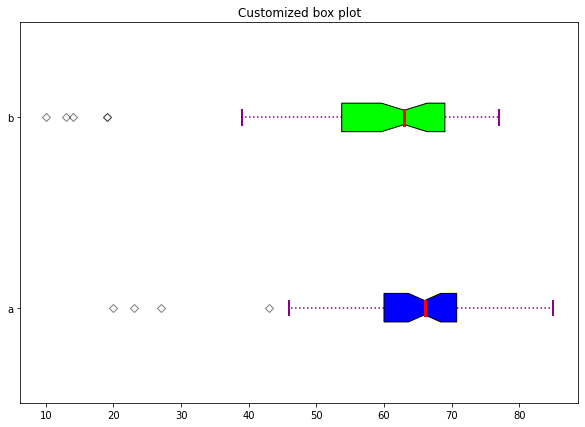

In [67]:
import matplotlib.pyplot as plt
data = [new_a, new_b]
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(111) 
  
# Creating axes instance 
bp = ax.boxplot(data, patch_artist = True, 
                notch ='True', vert = 0) 
  
colors = ['#0000FF', '#00FF00',  
          '#FFFF00', '#FF00FF'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
  
# changing color and linewidth of 
# whiskers 
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":") 
  
# changing color and linewidth of 
# caps 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
  
# changing color and linewidth of 
# medians 
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
  
# changing style of fliers 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
      
# x-axis labels 
ax.set_yticklabels(['a', 'b']) 
  
# Adding title  
plt.title("Customized box plot") 
  
# Removing top axes and right axes 
# ticks 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 
      
# show plot 
plt.show(bp) 

### Shot Power
For unequal variance t-test (Welch's t-test) set equal_var=False <br>
For equal variance t-test set equal_var=True

In [85]:
new_a = a['power_shot_power'].sample(n=30)
new_b = b['power_shot_power'].sample(n=30)
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(new_a,new_b, equal_var=False)
print("t = " + str(t2))
print("p = " + str(p2))

t = 1.6512587217247432
p = 0.10409523527202001


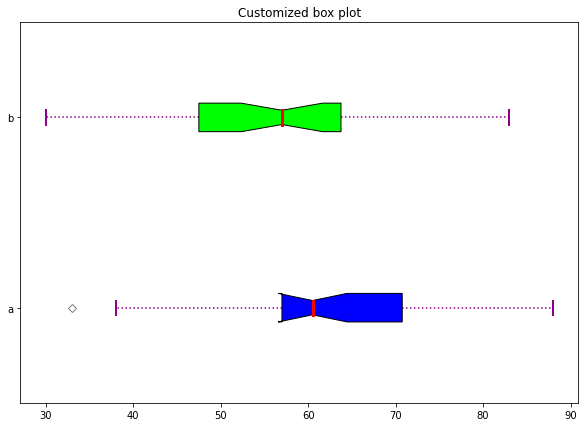

In [86]:
import matplotlib.pyplot as plt
data = [new_a, new_b]
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(111) 
  
# Creating axes instance 
bp = ax.boxplot(data, patch_artist = True, 
                notch ='True', vert = 0) 
  
colors = ['#0000FF', '#00FF00',  
          '#FFFF00', '#FF00FF'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
  
# changing color and linewidth of 
# whiskers 
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":") 
  
# changing color and linewidth of 
# caps 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
  
# changing color and linewidth of 
# medians 
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
  
# changing style of fliers 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
      
# x-axis labels 
ax.set_yticklabels(['a', 'b']) 
  
# Adding title  
plt.title("Customized box plot") 
  
# Removing top axes and right axes 
# ticks 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 
      
# show plot 
plt.show(bp) 

### Finishing
For unequal variance t-test (Welch's t-test) set equal_var=False <br>
For equal variance t-test set equal_var=True

In [89]:
new_a = a['attacking_finishing'].sample(n=30)
new_b = b['attacking_finishing'].sample(n=30)
## Cross Checking with the internal scipy function
t3, p3 = stats.ttest_ind(new_a,new_b, equal_var=False)
print("t = " + str(t3))
print("p = " + str(p3))

t = 1.8241169969474342
p = 0.07337972686565493


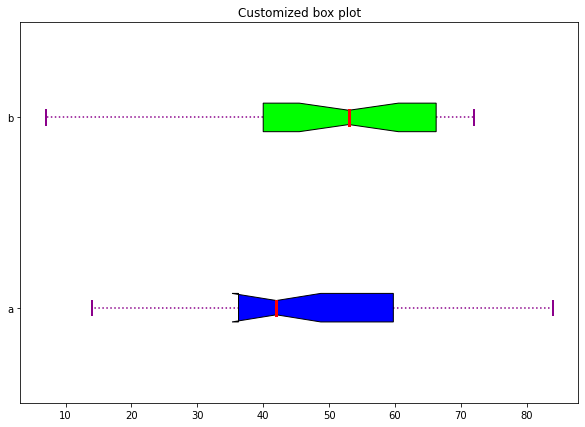

In [ ]:
import matplotlib.pyplot as plt
data = [new_a, new_b]
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(111) 
  
# Creating axes instance 
bp = ax.boxplot(data, patch_artist = True, 
                notch ='True', vert = 0) 
  
colors = ['#0000FF', '#00FF00',  
          '#FFFF00', '#FF00FF'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
  
# changing color and linewidth of 
# whiskers 
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":") 
  
# changing color and linewidth of 
# caps 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
  
# changing color and linewidth of 
# medians 
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
  
# changing style of fliers 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
      
# x-axis labels 
ax.set_yticklabels(['a', 'b']) 
  
# Adding title  
plt.title("Customized box plot") 
  
# Removing top axes and right axes 
# ticks 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 
      
# show plot 
plt.show(bp) 

# <a id='3'> Pick Top 5 Players per Position </a>
Available Positions: CAM, CB, CDM, CF, CM, GK, LB, LM, LW, LWB, RB, RM, RW, RWB, ST

In [ ]:
# Creating a method to compare 5 Players
def top5(ls_name, column, value):
    x = df_20[df_20["short_name"] == ls_name[0]]
    y = df_20[df_20["short_name"] == ls_name[1]]
    z = df_20[df_20["short_name"] == ls_name[2]]
    az = df_20[df_20["short_name"] == ls_name[3]]
    bz = df_20[df_20["short_name"] == ls_name[4]]

    
    trace0 = go.Scatterpolar(
      r = [x['pace'].values[0],x['shooting'].values[0],x['passing'].values[0],x['dribbling'].values[0],x['defending'].values[0],x['physic'].values[0],x["overall"].values[0]],
      theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
      line_color = 'yellow',
      name = x.short_name.values[0]
    )

    trace1 = go.Scatterpolar(
      r = [y['pace'].values[0],y['shooting'].values[0],y['passing'].values[0],y['dribbling'].values[0],y['defending'].values[0],y['physic'].values[0],y["overall"].values[0]],
      theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
      line_color = 'orange',
      name = y.short_name.values[0]
    )
    
    trace2 = go.Scatterpolar(
      r = [z['pace'].values[0],z['shooting'].values[0],z['passing'].values[0],z['dribbling'].values[0],z['defending'].values[0],z['physic'].values[0],z["overall"].values[0]],
      theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
       line_color = 'red',
      name = z.short_name.values[0]
    )
    
    trace3 = go.Scatterpolar(
      r = [az['pace'].values[0],az['shooting'].values[0],az['passing'].values[0],az['dribbling'].values[0],az['defending'].values[0],az['physic'].values[0],az["overall"].values[0]],
      theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
       line_color = 'blue',
      name = az.short_name.values[0]
    )
    
    trace4 = go.Scatterpolar(
      r = [bz['pace'].values[0],bz['shooting'].values[0],bz['passing'].values[0],bz['dribbling'].values[0],bz['defending'].values[0],bz['physic'].values[0],bz["overall"].values[0]],
      theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
       line_color = 'magenta',
      name = bz.short_name.values[0]
    )
    
    
    data = [trace0, trace1, trace2, trace3, trace4]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 100]
        )
      ),
      template="plotly_white",  
      showlegend = True,
      font=dict(family='Cambria, monospace', size=12, color='#000000'),
      title = "{} stats comparison for top 5 under €{} -: {} vs {} vs {} vs {} vs {}".format(column, value, x.short_name.values[0], y.short_name.values[0], z.short_name.values[0], az.short_name.values[0], bz.short_name.values[0] )
        
    )
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig, filename = "Player stats")
    return None

# Creating a method to pick top 5 player in position
def position(pos, value):
    column = str('Position_')+str.upper(pos)
    print("You've Entered Position: ",column)
    print("You've Entered Value €: ", value)
    ls_name = df_20[(df_20[column]==1) & (df_20['value_eur']<=value)]['short_name'].head(5).values
    print(ls_name)
    top5(ls_name, column, value)
    return None

### Test 1: 'LB'

In [ ]:
position('lb', 34000000)

You've Entered Position:  Position_LB
You've Entered Value €:  34000000
['Marcelo' 'Alex Sandro' 'Alex Telles' 'Grimaldo' 'L. Digne']


### Test 2: 'CDM'

In [ ]:
position('cdm', 44000000)

You've Entered Position:  Position_CDM
You've Entered Value €:  44000000
['Fernandinho' 'I. Rakitić' 'M. Pjanić' 'B. Matuidi' 'A. Witsel']


**Conclusion:** In this test scenario, we are listing out top 5 players suited for a playing position with a value constraint. Clubs looking for players for specific playing position with a budget constraint could identify top pick and further explore their performance to make a decisive buying decision.

# <a id='4'> Recommend Alternate Playing Position per Player </a>
Display alternate playing positions of a player which are not current playing positions of the player. <br>
*For Goalkeepers alternate playing position will have 0 ratings*

In [90]:
@widgets.interact(player = df_20.short_name)
def alternate_position(player):
    # Get player's index
    idx = df_20[df_20['short_name']==player].index[0]
    sample_1 = df_20.iloc[:,68:94]
    # Find 5 highest scores per position of player
    ls = sample_1.loc[idx].nlargest(5).index[0:].values
    ls = ls.tolist()
    sample_2 = df_20.iloc[idx,104:119]
    # Identify positions which are not current playing positions
    ls2 = sample_2[sample_2==1].index[:].values
    # Make index values lower case
    ls2 = list(map(lambda x: x.lower(), ls2.tolist()))
    ls2 = [re.sub(r'position_', '', i) for i in ls2]
    # Find Positions with highest rating and are not currently playing positions
    alt_pos = set(ls)-(set(ls2))
    print("Alternate Playing Positions for {} are".format(player))
    for i in alt_pos:
        print("Position: {}, Rating: {}".format(str.upper(i), df_20[i].values[idx]))
    return None

interactive(children=(Dropdown(description='player', options=('L. Messi', 'Cristiano Ronaldo', 'Neymar ', 'J. …

**Comments:** From the above test scenario we've listed out the best alternate playing position for a player. These alternate playing positions are suggested and doesn't not comprise of player's current playing positions. A club manager, scout or performance manager could try using a player in different role that might be suited to their statistics.

# <a id='5'> Player Recommendation </a>

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

### 1: Fetch numeric columns

In [92]:
sample = df_20.select_dtypes(include='number')
print(sample.head())

   ranking  age  height_cm  ...  Position_RWB  Position_ST        bmi
0        1   32        170  ...             0            1  24.913495
1        2   34        187  ...             0            1  23.735308
2        3   27        175  ...             0            0  22.204082
3        4   26        188  ...             0            0  24.615211
4        5   28        175  ...             0            0  24.163265

[5 rows x 111 columns]


### 2: Correlation Matrix

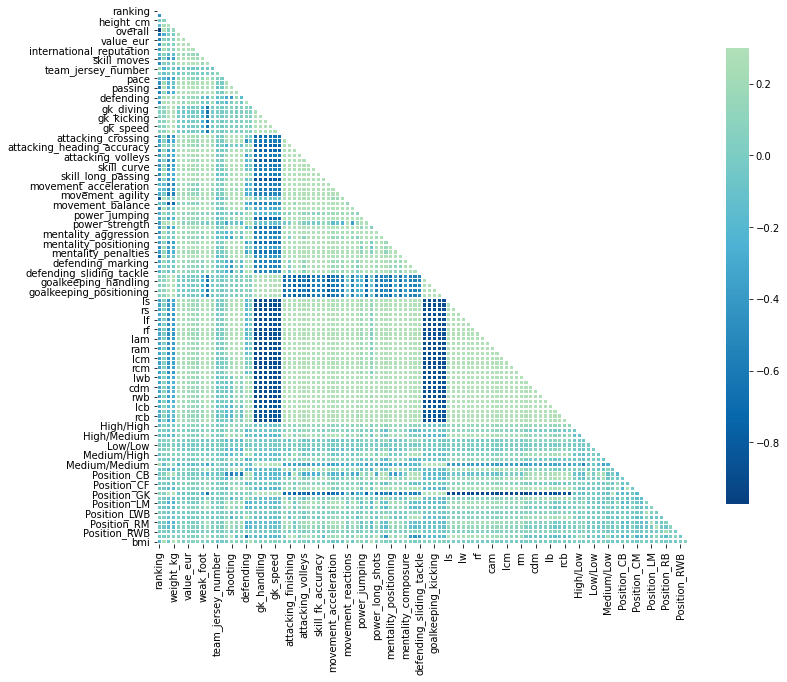

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))

# Compute the correlation matrix
corr = sample.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="GnBu_r", vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .7})

**Conclusion:** From the above correlation chart, we can see a lot of Goalkeepers attributes have a strong negative correlation with the attributes possessed by a Forward, Midfielder and Defender. Players with more attacking role have higher dribbling, passing and shooting skills.

### 3: Standardize, implement NearestNeighbors generate 5 similar players

In [94]:
scaled = StandardScaler()
X = scaled.fit_transform(sample)
recommendations = NearestNeighbors(n_neighbors=6,algorithm='kd_tree')
recommendations.fit(X)
player_index = recommendations.kneighbors(X)[1]


In [95]:

# Define a function to get Player's Index
def get_index(x):
    return df_20[df_20['short_name']==x].index.tolist()[0]

# Fetch 5 indexes of similar players
@widgets.interact(player = df_20.short_name)
def recommend_similar(player):
    print("These are 5 players similar to {} : ".format(player))
    index=  get_index(player)
    for i in player_index[index][1:]:
        print("Name: {}\nOverall: {}\nMarket Value: €{}\nAge: {}\nBMI: {:.2f}\n".format(df_20.iloc[i]['short_name'],df_20.iloc[i]['overall'], df_20.iloc[i]['value_eur'], df_20.iloc[i]['age'], df_20.iloc[i]['bmi']))

interactive(children=(Dropdown(description='player', options=('L. Messi', 'Cristiano Ronaldo', 'Neymar ', 'J. …

### Test 1: Eden Hazard

In [ ]:
recommend_similar('E. Hazard')

These are 5 players similar to E. Hazard : 
Name: A. Griezmann
Overall: 89
Market Value: €69000000
Age: 28
BMI: 23.57

Name: L. Messi
Overall: 94
Market Value: €95500000
Age: 32
BMI: 24.91

Name: Neymar 
Overall: 92
Market Value: €105500000
Age: 27
BMI: 22.20

Name: K. De Bruyne
Overall: 91
Market Value: €90000000
Age: 28
BMI: 21.37

Name: R. Sterling
Overall: 88
Market Value: €73000000
Age: 24
BMI: 23.88



### Test 2: J. Gomez

In [ ]:
recommend_similar('J. Gomez')

These are 5 players similar to J. Gomez : 
Name: M. Holgate
Overall: 75
Market Value: €8000000
Age: 22
BMI: 22.15

Name: N. Mukiele
Overall: 77
Market Value: €12000000
Age: 21
BMI: 21.62

Name: B. Pavard
Overall: 79
Market Value: €15500000
Age: 23
BMI: 21.97

Name: A. Tuanzebe
Overall: 73
Market Value: €6500000
Age: 21
BMI: 21.04

Name: N. Elvedi
Overall: 78
Market Value: €13000000
Age: 22
BMI: 21.84



### Test 3: Alisson

In [ ]:
recommend_similar('Alisson')

These are 5 players similar to Alisson : 
Name: Ederson
Overall: 88
Market Value: €54500000
Age: 25
BMI: 24.33

Name: De Gea
Overall: 89
Market Value: €56000000
Age: 28
BMI: 22.24

Name: T. Courtois
Overall: 88
Market Value: €48000000
Age: 27
BMI: 24.24

Name: M. ter Stegen
Overall: 90
Market Value: €67500000
Age: 27
BMI: 24.31

Name: W. Szczęsny
Overall: 86
Market Value: €37500000
Age: 29
BMI: 23.67



**Conclusion:** The player recommendation system takes into account 111 attributes to compute similarity among players based on their skillset, physical attributes, playing position, preferred foot, value, age, and work rate. Having a player recommendation system allows scouts and performance coaches to identify a player which they will be targeting in tranfer window market to buy or to fill a replacement position of outgoing player.

# <a id='6'> Club Similarity Rating</a>

In [96]:
sample = df_20.sort_values(by=['overall'], ascending=False)
new_sample = pd.DataFrame(columns = ["overall", "pace", "shooting", "passing", "dribbling", "defending", "physic", "team"])
for club in sample['club'].unique():
    overall = sample[sample['club']==club][0:24]['overall'].median()
    pace = sample[sample['club']==club][0:24]['pace'].median()
    shooting = sample[sample['club']==club][0:24]['shooting'].median()
    passing = sample[sample['club']==club][0:24]['passing'].median()
    dribbling = sample[sample['club']==club][0:24]['dribbling'].median()
    defending = sample[sample['club']==club][0:24]['defending'].median()
    physic = sample[sample['club']==club][0:24]['physic'].median()
    team = club
    data = [overall, pace, shooting, passing, dribbling, defending, physic, team]
    df_length = len(new_sample)
    new_sample.loc[df_length] = data

In [97]:
new_sample

overall  pace  shooting  ...  defending  physic                 team
0       84.5  73.0      63.5  ...       71.0    72.5         FC Barcelona
1       83.5  69.5      68.0  ...       72.5    74.0             Juventus
2       82.0  75.0      64.0  ...       70.5    72.0  Paris Saint-Germain
3       81.5  73.0      66.5  ...       73.0    73.0      Atlético Madrid
4       85.0  78.0      72.5  ...       62.5    71.5          Real Madrid
..       ...   ...       ...  ...        ...     ...                  ...
693     58.0  67.0      49.0  ...       52.0    61.0         Sligo Rovers
694     56.0  66.0      48.0  ...       51.5    60.5           Finn Harps
695     60.0  69.0      35.0  ...       57.0    62.0          Seongnam FC
696     54.0  62.0      38.0  ...       49.0    56.0              UCD AFC
697     57.0  64.0      26.0  ...       56.0    56.0        Śląsk Wrocław

[698 rows x 8 columns]

In [98]:
scaled = StandardScaler()
X = scaled.fit_transform(new_sample.iloc[:,0:7])
recommendations = NearestNeighbors(n_neighbors=4,algorithm='kd_tree')
recommendations.fit(X)
club_index = recommendations.kneighbors(X)[1]

In [99]:
# Define a function to get Club's Index
def get_index(x):
    return new_sample[new_sample['team']==x].index.tolist()[0]

# Fetch 5 indexes of similar players
@widgets.interact(club = new_sample.team)
def recommend_similar(club):
    print("These are 3 clubs similar to {} : ".format(club))
    index=  get_index(club)
    for i in club_index[index][1:]:
        print("Name: {}\nOverall: {}\nPace: {}\nShooting: {}\nPassing: {}\nDribbling: {}\nDefending: {}\n".format(new_sample.iloc[i]['team'],new_sample.iloc[i]['overall'],new_sample.iloc[i]['pace'],new_sample.iloc[i]['shooting'],new_sample.iloc[i]['passing'],new_sample.iloc[i]['dribbling'],new_sample.iloc[i]['defending']))

interactive(children=(Dropdown(description='club', options=('FC Barcelona', 'Juventus', 'Paris Saint-Germain',…

### Test 1: FC Barcelona

In [ ]:
recommend_similar('FC Barcelona')

These are 3 clubs similar to FC Barcelona : 
Name: Tottenham Hotspur
Overall: 80.5
Pace: 73.5
Shooting: 64.0
Passing: 74.0
Dribbling: 77.0
Defending: 71.0

Name: Paris Saint-Germain
Overall: 82.0
Pace: 75.0
Shooting: 64.0
Passing: 72.5
Dribbling: 77.5
Defending: 70.5

Name: Atlético Madrid
Overall: 81.5
Pace: 73.0
Shooting: 66.5
Passing: 72.5
Dribbling: 75.0
Defending: 73.0



### Test 2: FC Bayern München

In [ ]:
recommend_similar('FC Bayern München')

These are 3 clubs similar to FC Bayern München : 
Name: Liverpool
Overall: 82.0
Pace: 74.0
Shooting: 65.5
Passing: 76.5
Dribbling: 77.0
Defending: 65.5

Name: Manchester City
Overall: 84.0
Pace: 72.5
Shooting: 66.5
Passing: 77.0
Dribbling: 79.0
Defending: 60.0

Name: Chelsea
Overall: 80.0
Pace: 70.5
Shooting: 67.0
Passing: 71.5
Dribbling: 76.5
Defending: 64.5



### Test 3: Juventus

In [ ]:
recommend_similar('Juventus')

These are 3 clubs similar to Juventus : 
Name: FC Barcelona
Overall: 84.5
Pace: 73.0
Shooting: 63.5
Passing: 76.0
Dribbling: 78.0
Defending: 71.0

Name: Atlético Madrid
Overall: 81.5
Pace: 73.0
Shooting: 66.5
Passing: 72.5
Dribbling: 75.0
Defending: 73.0

Name: Tottenham Hotspur
Overall: 80.5
Pace: 73.5
Shooting: 64.0
Passing: 74.0
Dribbling: 77.0
Defending: 71.0

